In [14]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [15]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [16]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

1. Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

I would think the ward method produces the most reasonable result.

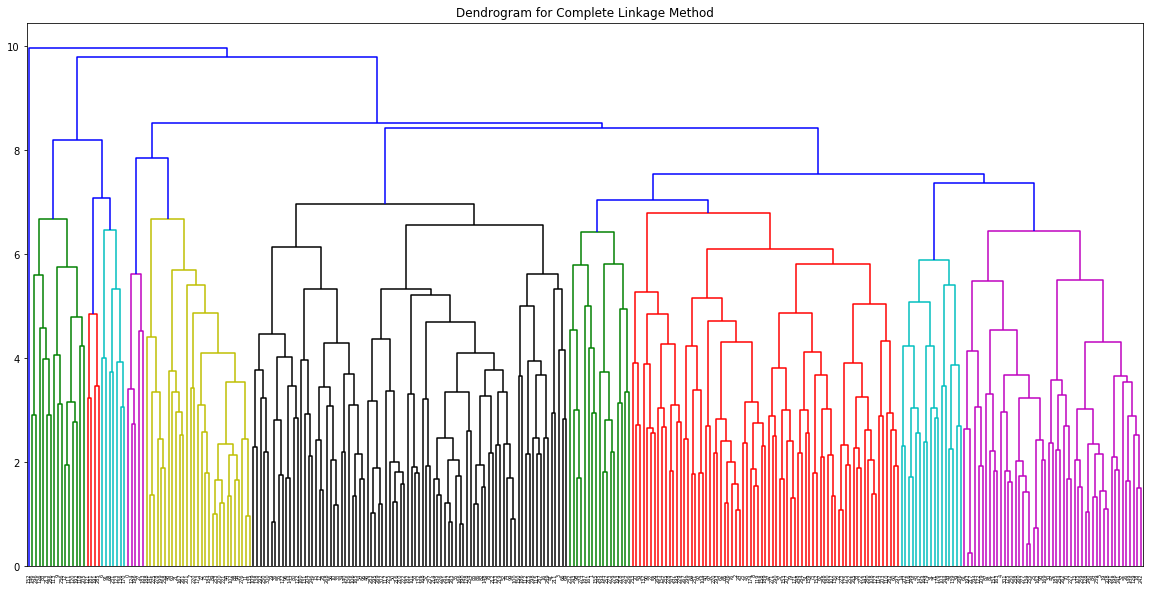

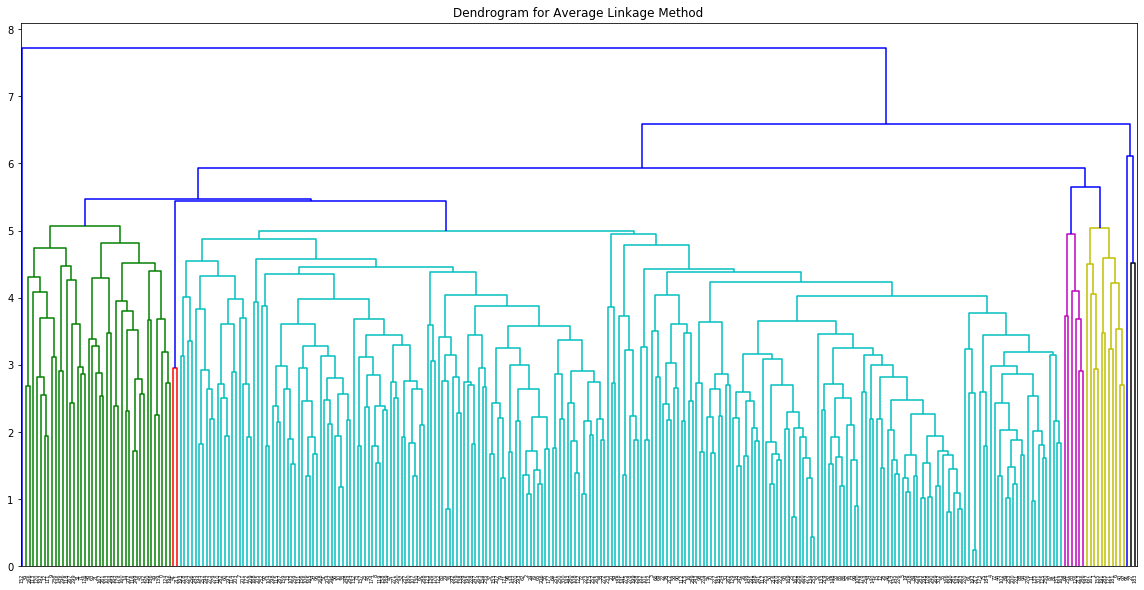

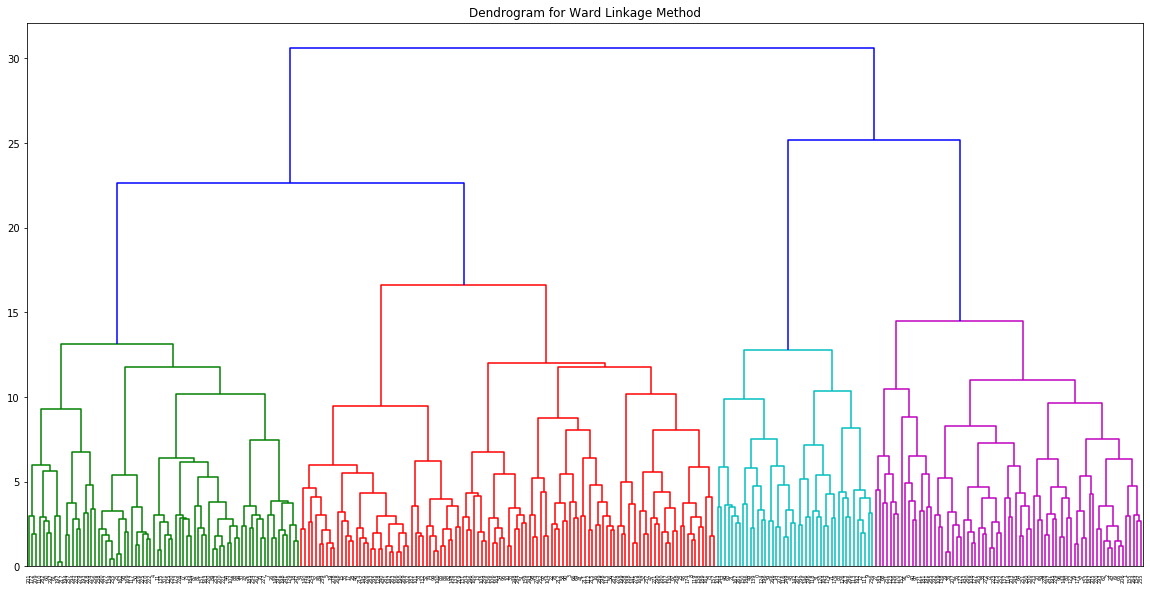

In [12]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.title('Dendrogram for Complete Linkage Method')
plt.show()

plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.title('Dendrogram for Average Linkage Method')
plt.show()

plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.title('Dendrogram for Ward Linkage Method')
plt.show()

2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better? 

I had to change the affinity for the cluster using Ward linkage to Euclidean. The clusters using the Average affinity had the highest ARI and silhouette scores between the hierarchical clustering models with scores of 0.294 and 0.148 respectively, but the k-means model using two clusters performs best with scores of 0.436 and 0.174.

In [19]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print('ARI score for two clusters with complete linkage: ', metrics.adjusted_rand_score(y, clusters))
print('Silhouette score for two clusters with complete linkage: ', metrics.silhouette_score(X_std, clusters, metric='euclidean'))

ARI score for two clusters with complete linkage:  0.21394030618551016
Silhouette score for two clusters with complete linkage:  0.11730765444448985


In [20]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print('ARI score for two clusters with average linkage: ', metrics.adjusted_rand_score(y, clusters))
print('Silhouette score for two clusters with average linkage: ', metrics.silhouette_score(X_std, clusters, metric='euclidean'))

ARI score for two clusters with average linkage:  0.2940490133353465
Silhouette score for two clusters with average linkage:  0.14837359969689895


In [22]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print('ARI score for two clusters with ward linkage: ', metrics.adjusted_rand_score(y, clusters))
print('Silhouette score for two clusters with ward linkage: ', metrics.silhouette_score(X_std, clusters, metric='euclidean'))

ARI score for two clusters with ward linkage:  0.146129913123814
Silhouette score for two clusters with ward linkage:  0.1387197366557222
